## 일부러 오버피팅
매개변수 많고 표현력 높음  
훈련 데이터 적음  

In [6]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

(x_train, t_train), (x_test,t_test) = load_mnist(normalize = True)

x_train = x_train[:300]
t_train = t_train[:300]

network = MultiLayerNet(input_size = 784, hidden_size_list=[100,100,100,100,100,100], output_size = 10)
optimizer = SGD(lr=0.01)
max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))
        
        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

epoch:0, train acc:0.11, test acc:0.108
epoch:1, train acc:0.12333333333333334, test acc:0.1114
epoch:2, train acc:0.13333333333333333, test acc:0.1177
epoch:3, train acc:0.13666666666666666, test acc:0.1239
epoch:4, train acc:0.15666666666666668, test acc:0.1317
epoch:5, train acc:0.17333333333333334, test acc:0.1439
epoch:6, train acc:0.19666666666666666, test acc:0.1498
epoch:7, train acc:0.20333333333333334, test acc:0.1574
epoch:8, train acc:0.22333333333333333, test acc:0.1638
epoch:9, train acc:0.24666666666666667, test acc:0.1755
epoch:10, train acc:0.26, test acc:0.1885
epoch:11, train acc:0.31333333333333335, test acc:0.208
epoch:12, train acc:0.33666666666666667, test acc:0.2167
epoch:13, train acc:0.36666666666666664, test acc:0.2387
epoch:14, train acc:0.37666666666666665, test acc:0.2508
epoch:15, train acc:0.41, test acc:0.2803
epoch:16, train acc:0.44, test acc:0.306
epoch:17, train acc:0.45666666666666667, test acc:0.3225
epoch:18, train acc:0.4666666666666667, test ac

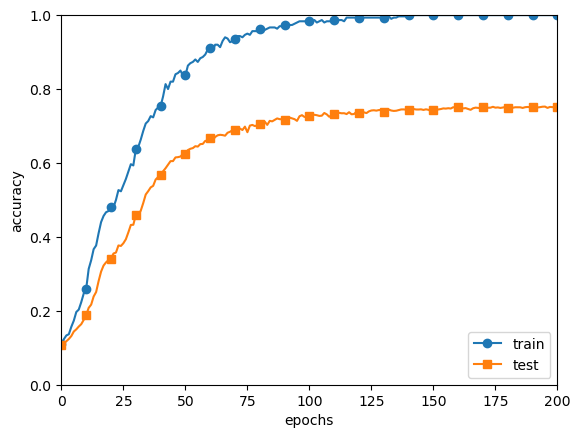

In [7]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.xlim(0,200)
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [8]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

x_train = x_train[:300]
t_train = t_train[:300]

weight_decay_lambda = 0.1

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

epoch:0, train acc:0.08, test acc:0.088
epoch:1, train acc:0.1, test acc:0.1
epoch:2, train acc:0.11666666666666667, test acc:0.1126
epoch:3, train acc:0.14, test acc:0.1231
epoch:4, train acc:0.18333333333333332, test acc:0.1362
epoch:5, train acc:0.22, test acc:0.1513
epoch:6, train acc:0.23333333333333334, test acc:0.1622
epoch:7, train acc:0.26, test acc:0.1808
epoch:8, train acc:0.2833333333333333, test acc:0.1974
epoch:9, train acc:0.3233333333333333, test acc:0.2221
epoch:10, train acc:0.3433333333333333, test acc:0.2417
epoch:11, train acc:0.38666666666666666, test acc:0.2675
epoch:12, train acc:0.4, test acc:0.2932
epoch:13, train acc:0.42, test acc:0.3187
epoch:14, train acc:0.43333333333333335, test acc:0.332
epoch:15, train acc:0.44666666666666666, test acc:0.3404
epoch:16, train acc:0.45, test acc:0.3578
epoch:17, train acc:0.4666666666666667, test acc:0.3659
epoch:18, train acc:0.48333333333333334, test acc:0.3786
epoch:19, train acc:0.5066666666666667, test acc:0.3924
ep

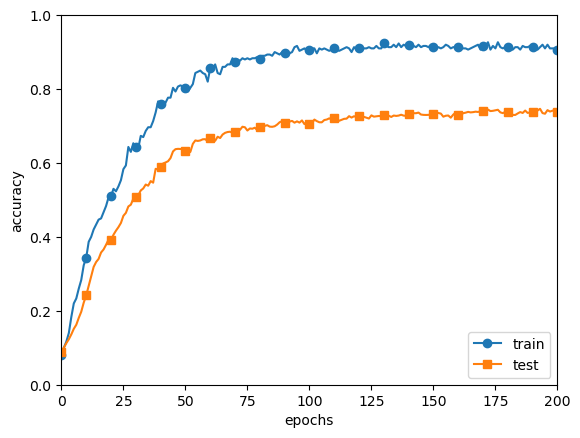

In [9]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.xlim(0,200)
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [10]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_fig = True):
        if train_fig:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x*self.mask

        else:
            return x*(1.0-self.dropout_ratio)

    def backward(self, dout):
        return dout*self.mask

## 드롭아웃 적용 x

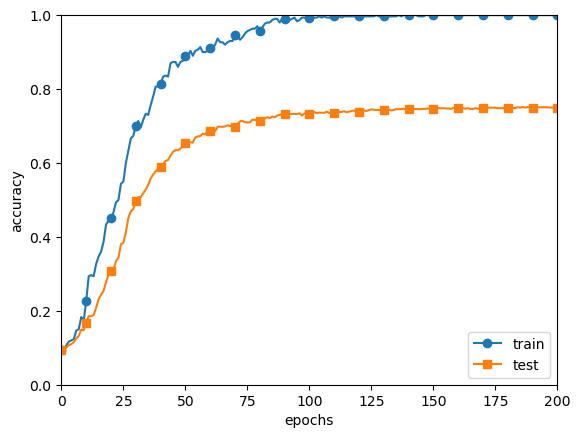

In [11]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

(x_train, t_train), (x_test,t_test) = load_mnist(normalize = True)

x_train = x_train[:300]
t_train = t_train[:300]

network = MultiLayerNet(input_size = 784, hidden_size_list=[100,100,100,100,100,100], output_size = 10)
optimizer = SGD(lr=0.01)
max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.xlim(0,200)
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

## 드롭아웃 적용 O

train loss:2.3356269930410942
=== epoch:1, train acc:0.09666666666666666, test acc:0.0965 ===
train loss:2.318648302469871
train loss:2.3581624567127024
train loss:2.35868055757806
=== epoch:2, train acc:0.09666666666666666, test acc:0.0943 ===
train loss:2.3291332550303974
train loss:2.310006482025612
train loss:2.334821013617595
=== epoch:3, train acc:0.09666666666666666, test acc:0.0933 ===
train loss:2.32969042689499
train loss:2.313221333636592
train loss:2.3182255148888613
=== epoch:4, train acc:0.09333333333333334, test acc:0.0933 ===
train loss:2.3027650353676345
train loss:2.3209456857890136
train loss:2.2976740073053503
=== epoch:5, train acc:0.09333333333333334, test acc:0.092 ===
train loss:2.3076463664356193
train loss:2.302337553213611
train loss:2.3267496339083396
=== epoch:6, train acc:0.09666666666666666, test acc:0.0906 ===
train loss:2.320528604069632
train loss:2.298750409009864
train loss:2.2925201988105113
=== epoch:7, train acc:0.10333333333333333, test acc:0.090

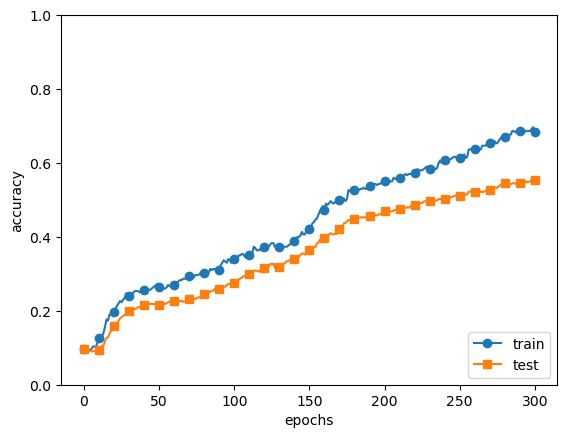

In [12]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from common.optimizer import SGD
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비율 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [15]:
from common.util import shuffle_dataset

(x_train, t_train), (x_test, t_test) = load_mnist()

x_train, t_train = shuffle_dataset(x_train,t_train)

validation_rate = 0.20
validation_num = int(x_train.shape[0]*validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

In [16]:
weight_decay = 10**np.random.uniform(-8,-4)
lr = 10**np.random.uniform(-6,-2)

val acc:0.1 | lr:2.0043199049333628e-06, weight decay:1.974653805258038e-06
val acc:0.59 | lr:0.003537619717575928, weight decay:5.172285605898821e-06
val acc:0.1 | lr:0.0002339509899885876, weight decay:6.549224180146896e-06
val acc:0.19 | lr:0.00032585867754000007, weight decay:1.98462938226862e-06
val acc:0.28 | lr:0.002392104817527826, weight decay:1.6229884694661344e-05
val acc:0.78 | lr:0.006686012003207458, weight decay:9.059460055641107e-06
val acc:0.2 | lr:0.001133377950213233, weight decay:4.6926574269703976e-08
val acc:0.04 | lr:1.6327919365228662e-05, weight decay:1.2416094267929096e-08
val acc:0.14 | lr:4.4899198443603446e-05, weight decay:1.7679168635908272e-06
val acc:0.05 | lr:4.2114139541023176e-05, weight decay:3.103122207986216e-07
val acc:0.14 | lr:0.00013909371855680416, weight decay:1.3625734158196267e-06
val acc:0.56 | lr:0.004169790561626513, weight decay:2.7280720971326348e-08
val acc:0.25 | lr:0.0013656656401863435, weight decay:5.190286430561061e-06
val acc:0

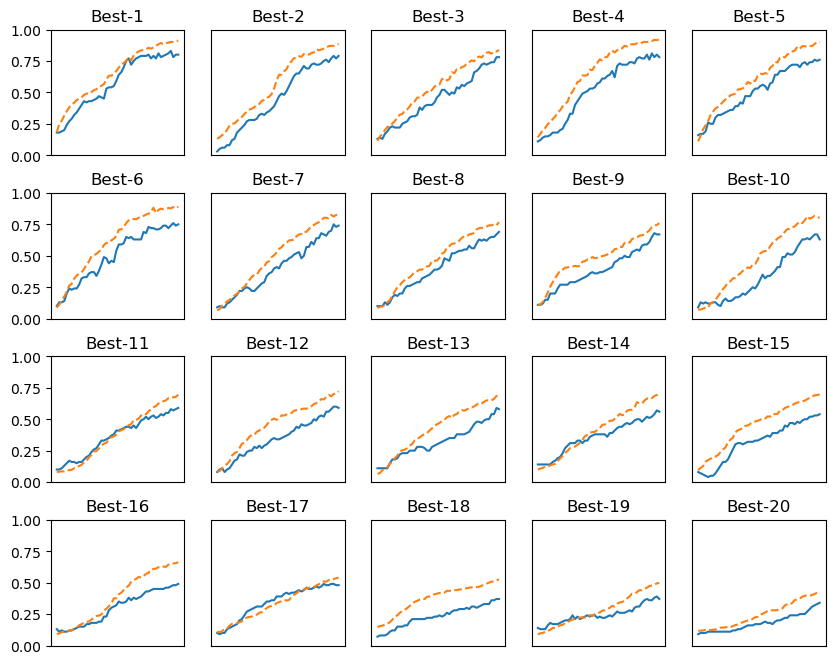

In [17]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from common.optimizer import SGD
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

plt.figure(figsize=(10, 8))

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.subplots_adjust(wspace=0.2, hspace=0.3)    
plt.show()